Text Mining & Image Recognition  
Ramiro Wong  
23000952  


# Proyecto Final parte 1: NLP

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

Conexión con Drive para acceder a datos.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Lectura de datos

In [47]:
dataset = pd.read_csv('/content/drive/MyDrive/Proyecto_TextMining/tw_source.csv',
                      encoding='latin_1', header=None)
dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']
dataset.head()

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [48]:
lista_menciones = []
filas_per_at = {}
cont = 0

for tweet in dataset["tweet"]:
   ats_in_tweet = [palabra for palabra in tweet.split(" ") if "@" in palabra]
   lista_menciones.extend(ats_in_tweet)

   try:
    ultimo_at = ats_in_tweet[len(ats_in_tweet) - 1]
    filas_per_at.setdefault(ultimo_at, []).append(cont)
   except:
    pass
   finally:
    cont = cont + 1

## Top 3 de usuarios con más menciones

In [49]:
contador_menciones = Counter(lista_menciones)
contador_menciones.most_common(4)[1:]

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

## Generación de Corpus

In [51]:
filas_mileycyrus = filas_per_at['@mileycyrus']
corpus_mileycyrus = dataset.iloc[filas_mileycyrus, [1, 2, 5]]
corpus_mileycyrus["length"] = corpus_mileycyrus["tweet"].str.len()
corpus_mileycyrus.rename(columns={'fecha': 'timestamp'}, inplace=True)
corpus_mileycyrus

,id,timestamp,tweet,length
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...,107
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ...",137
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...,72
2080,1468298918,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...,100
2156,1468318249,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...,112
...,...,...,...,...
1595291,2192336083,Tue Jun 16 06:52:58 PDT 2009,Hey @mileycyrus I voted for you at the teen ch...,104
1596796,2192768714,Tue Jun 16 07:31:21 PDT 2009,@mileycyrus http://twitpic.com/7f5fy - I love ...,112
1597905,2193052811,Tue Jun 16 07:55:55 PDT 2009,@mileycyrus i see the photos of your KISS iss ...,74
1598348,2193155701,Tue Jun 16 08:04:20 PDT 2009,@mileycyrus i am definitley definitley getting...,139


In [52]:
filas_tommcfly = filas_per_at['@tommcfly']
corpus_tommcfly = dataset.iloc[filas_tommcfly, [1, 2, 5]]
corpus_tommcfly["length"] = corpus_tommcfly["tweet"].str.len()
corpus_tommcfly.rename(columns={'fecha': 'timestamp'}, inplace=True)
corpus_tommcfly

,id,timestamp,tweet,length
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,@tommcfly Good morning Tom! Why can't I send y...,131
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,@tommcfly did you know that johnsons baby use ...,96
3029,1468502040,Tue Apr 07 02:03:41 PDT 2009,"@dougiemcfly @tommcfly good morning guys, how ...",108
3524,1468618787,Tue Apr 07 02:46:02 PDT 2009,"@tommcfly hey, no chance of adding brighton or...",131
3783,1468674970,Tue Apr 07 03:05:49 PDT 2009,"@tommcfly have fun tom, i need to buy eclipse ...",82
...,...,...,...,...
1594946,2192269225,Tue Jun 16 06:46:41 PDT 2009,@tommcfly you should record Star Girl with JB,46
1595131,2192311895,Tue Jun 16 06:50:40 PDT 2009,@tommcfly why you at the studio then? just wa...,125
1595194,2192315339,Tue Jun 16 06:50:59 PDT 2009,@tommcfly Gonna make a trip to England in the ...,71
1597053,2192836467,Tue Jun 16 07:37:16 PDT 2009,@tommcfly Heya Tom! You should follow Peter Fa...,102


In [53]:
filas_ddlovato = filas_per_at['@ddlovato']
corpus_ddlovato = dataset.iloc[filas_ddlovato, [1, 2, 5]]
corpus_ddlovato["length"] = corpus_ddlovato["tweet"].str.len()
corpus_ddlovato.rename(columns={'fecha': 'timestamp'}, inplace=True)
corpus_ddlovato

,id,timestamp,tweet,length
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't,40
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...,96
7089,1469674492,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon...",79
8611,1548280868,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...,85
9492,1548773731,Fri Apr 17 21:56:12 PDT 2009,@ddlovato I just saw your tour dates and now I...,116
...,...,...,...,...
1590266,2191372145,Tue Jun 16 05:08:09 PDT 2009,@ddlovato is there a deluxe edition cause then...,92
1590351,2191386240,Tue Jun 16 05:09:58 PDT 2009,"@ddlovato Hahaha Demi, naughty Demi! I love y...",72
1592766,2191807303,Tue Jun 16 06:00:23 PDT 2009,@ddlovato hope to see you soon,31
1593330,2191922960,Tue Jun 16 06:12:27 PDT 2009,@ddlovato I VOTED!! =]]] can't wait,36


### Descarga de librerías y Modelo de lenguaje en inglés

In [54]:
import spacy
import spacy.cli
import re

In [55]:
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [56]:
nlp = spacy.load("en_core_web_md")

### 1. Normalización

In [57]:
def Normalizacion(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return new_corpus

In [58]:
corpus_mileycyrus_normalizado = Normalizacion(corpus_mileycyrus["tweet"])
corpus_tommcfly_normalizado = Normalizacion(corpus_tommcfly["tweet"])
corpus_ddlovato_normalizado = Normalizacion(corpus_ddlovato["tweet"])

### 2. Tokenization

In [59]:
def tokenizacion(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(nlp(doc))
  return new_corpus

In [60]:
corpus_mileycyrus_tokenizado = tokenizacion(corpus_mileycyrus_normalizado)
corpus_tommcfly_tokenizado = tokenizacion(corpus_tommcfly_normalizado)
corpus_ddlovato_tokenizado = tokenizacion(corpus_ddlovato_normalizado)

### 3. Remover Stopwords

In [61]:
def remove_stopwords(documentos):
  new_corpus = []
  for doc in documentos:
    s = ''
    for token in doc:
      if(token.is_stop == False):
        s = s + token.text + ' '
    new_corpus.append(nlp(s.strip()))
  return new_corpus

In [62]:
corpus_mileycyrus_no_stopwords = remove_stopwords(corpus_mileycyrus_tokenizado)
corpus_tommcfly_no_stopwords = remove_stopwords(corpus_tommcfly_tokenizado)
corpus_ddlovato_no_stopwords = remove_stopwords(corpus_ddlovato_tokenizado)

### 4. Stemming y Lemmating

In [63]:
def stemming_lemmating(documentos):
  new_corpus = []
  for doc in documentos:
    s = ''
    for token in doc:
        s = s + token.lemma_ + ' '
    new_corpus.append(s.strip())
  return new_corpus

In [64]:
corpus_mileycyrus_stemming_lemmating = stemming_lemmating(corpus_mileycyrus_no_stopwords)
corpus_tommcfly_stemming_lemmating = stemming_lemmating(corpus_tommcfly_no_stopwords)
corpus_ddlovato_stemming_lemmating = stemming_lemmating(corpus_ddlovato_no_stopwords)


### 5. Conteo Palabras

In [65]:
def corpus_to_string(documentos):
  str_out = ''
  for doc in documentos:
    str_out = str_out + doc + ' '
  return str_out

In [66]:
# conversión de corpus a string
str_mileycyrus = corpus_to_string(corpus_mileycyrus_stemming_lemmating)
str_tommcfly = corpus_to_string(corpus_tommcfly_stemming_lemmating)
str_ddlovato = corpus_to_string(corpus_ddlovato_stemming_lemmating)

In [67]:
# conversion de string a lista
list_mileycyrus = str_mileycyrus.strip().split(' ')
list_tommcfly = str_tommcfly.strip().split(' ')
list_ddlovato = str_ddlovato.strip().split(' ')

In [68]:
from collections import Counter

In [69]:
count_mileycyrus = Counter(list_mileycyrus)
count_mileycyrus = pd.DataFrame(count_mileycyrus.items(), columns=['palabra', 'frecuencia'])
count_mileycyrus = count_mileycyrus.sort_values(by='frecuencia', ascending=False)

# remover espacios y palabras redundantes
palabras_eliminar = ["", "mileycyrus", "miley"]
count_mileycyrus = count_mileycyrus[~count_mileycyrus['palabra'].isin(palabras_eliminar)]

# remover letras
count_mileycyrus = count_mileycyrus[count_mileycyrus['palabra'].str.len() > 1]

count_mileycyrus.head(10)

,palabra,frecuencia
12,love,790
2,not,695
101,good,415
699,vote,399
49,come,315
27,hope,270
439,win,238
3,like,235
47,go,218
149,movie,200


In [70]:
count_tommcfly = Counter(list_tommcfly)
count_tommcfly = pd.DataFrame(count_tommcfly.items(), columns=['palabra', 'frecuencia'])
count_tommcfly = count_tommcfly.sort_values(by='frecuencia', ascending=False)

# remover espacios y palabras redundantes
palabras_eliminar = ["", "tommcfly", "tom"]
count_tommcfly = count_tommcfly[~count_tommcfly['palabra'].isin(palabras_eliminar)]

# remover letras
count_tommcfly = count_tommcfly[count_tommcfly['palabra'].str.len() > 1]

count_tommcfly.head(10)

,palabra,frecuencia
4,not,745
38,love,432
46,come,359
1,good,326
84,xx,285
23,guy,267
17,like,251
160,haha,248
25,reply,220
93,brazil,220


In [71]:
count_ddlovato = Counter(list_ddlovato)
count_ddlovato = pd.DataFrame(count_ddlovato.items(), columns=['palabra', 'frecuencia'])
count_ddlovato = count_ddlovato.sort_values(by='frecuencia', ascending=False)

# remover espacios y palabras redundantes
palabras_eliminar = ["", "ddlovato", "demi"]
count_ddlovato = count_ddlovato[~count_ddlovato['palabra'].isin(palabras_eliminar)]

# remover letras
count_ddlovato = count_ddlovato[count_ddlovato['palabra'].str.len() > 1]

count_ddlovato.head(10)

,palabra,frecuencia
2,not,667
115,love,569
28,come,338
3,wish,239
9,good,236
57,like,216
38,wait,216
429,hope,207
98,ur,177
15,go,176


### 6. WordCloud

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [73]:
def grafica_wordcloud(df):
  # crear diccionario de palabras
  word_freq = dict(zip(df['palabra'], df['frecuencia']))

  # generacion de  word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# 1. Miley Cyrus

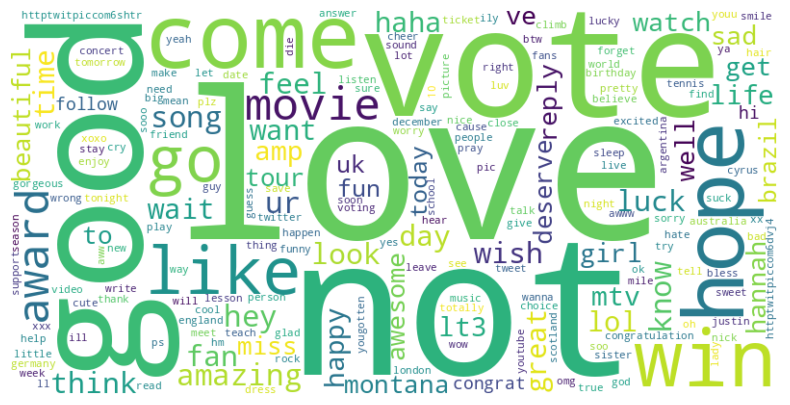

In [74]:
grafica_wordcloud(count_mileycyrus)

# 2. Tom McFly

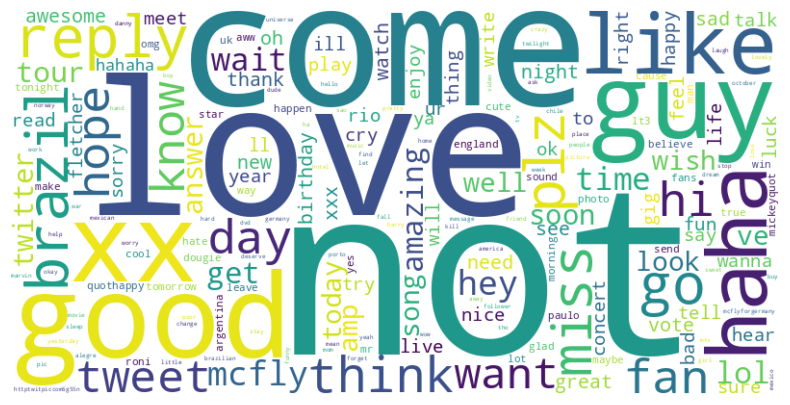

In [75]:
grafica_wordcloud(count_tommcfly)

# 3. Demi Lovato

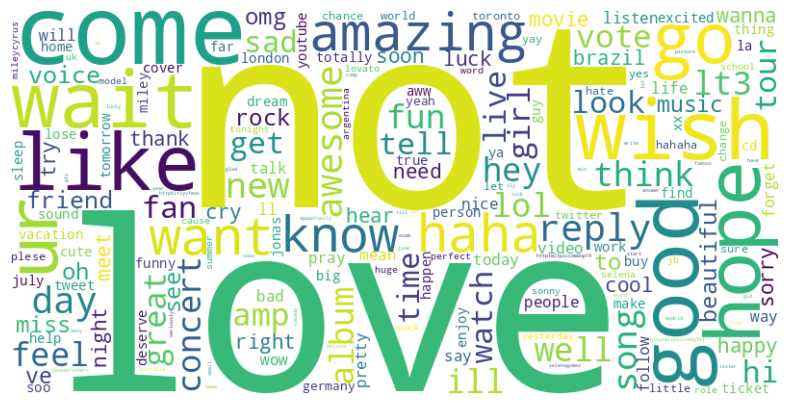

In [76]:
grafica_wordcloud(count_ddlovato)